# Programming in Python


## 1. Getting to know Python

### Different ways to interact with Python
 1. Using the interpreter (for instance `ipython`)
 2. Using the `jupyter notebook`
 3. Writing and executing programs (`python myProgram.py`)

### Python language elements

 #### Python as a calculator 
   * operations 
   * math functions

#### numbers 
 * integers
 * floats

#### working with strings 
 * single line
 * extending obver several lines
 * converting numbers to string

#### packing things together -- lists and tuples
 * length
 * indexing 
 * slicing

#### accessing values by keys -- dictionaries
 * example

 #### storing data in **variables**
  * setting and retrieving 

 #### printing
  * default print
  * formatted print

 #### **Identation** is part of the language!
   * loops
   * conditionals
   * scoping

#### functions

#### comments

### Common pitfalls
 * watch out for indentation
 * comparing floats may yield unintented consequences
 * integer division (//) vs division (/)
 * in place vs function that return new objects

## 2. Python with batteries charged

### Plotting with matplotlib 

 * Line plots
 * Surface plots
 * Plotting inside `jupyter` documents

### Numpy for fast array operations (Matlab and IDL users pay attention)

$$\frac{\partial f}{\partial t} + u \frac{\partial f}{\partial x} = 0$$
$$f_i^{t + \Delta t} = (1 - C) f_i^t + C f_{i-1}^t$$ with $$C \equiv \frac{u \Delta t}{\Delta x}$$

Up-wind mplementation:

`newf[i] = (1 - c)*f[i] + c*f[i - 1]` for $i \in 1...n-1$

`newf[0] = (1 - c)*f[0] + c*f[-1]` (assuming periodic boundary conditions)

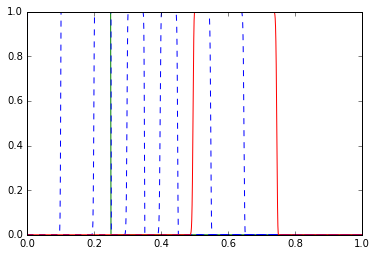

In [34]:
import numpy
from matplotlib import pylab

def step(f, c):
    newf = (1 - c)*f
    newf[1:] += c*f[:-1]
    newf[0] += c*f[-1] # periodic
    return newf

def advance(f0, c, nt=10):
    f = f0[:] # copy
    x = numpy.linspace(0., 1., len(f))
    pylab.plot(x, f0, 'g-')
    for i in range(nt):
        newf = step(f, c)
        f[:] = newf # copy the content of newf into the existing f
        if i % 100 == 0: 
            pylab.plot(x, f, 'b--')
    pylab.plot(x, f, 'r-')
    
n = 1000
f0 = numpy.zeros([n], numpy.float64)# initial condition
f0[0:n//4] = 1.
advance(f0, 0.99, nt=500)


### Pandas for data analysis (R users pay attention)

What the relation between prosperity and latitude?
 * Look at GDP data for a number of cities around the world
 * Get the population and the latitude data for these cities
 * Compute the GDP per capita for each city
 * plot GDP per capita data against the latitude of each city

In [37]:
import pandas

In [39]:
gdp = pandas.read_csv('https://raw.github.com/pletzer/jupyterMoons/master/citiesGDP.csv')
gdp.head()

,Rank,City/Urban area,Country,GDP in US$bn 2005
0,1,Tokyo,Japan,1191
1,2,New York,USA,1133
2,3,Los Angeles,USA,639
3,4,Chicago,USA,460
4,5,Paris,France,460


In [112]:
geo = pandas.read_csv('http://simplemaps.com/static/demos/resources/world-cities/world_cities.csv')
geo.head()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan


In [113]:
geo.drop(['lng', 'iso2', 'iso3', 'province'], axis=1, inplace=True)
geo.head()

,city,city_ascii,lat,pop,country
0,Qal eh-ye Now,Qal eh-ye,34.983000,2997.0,Afghanistan
1,Chaghcharan,Chaghcharan,34.516701,15000.0,Afghanistan
2,Lashkar Gah,Lashkar Gah,31.582998,201546.0,Afghanistan
3,Zaranj,Zaranj,31.112001,49851.0,Afghanistan
4,Tarin Kowt,Tarin Kowt,32.633298,10000.0,Afghanistan


In [134]:
geo[(geo['country'] == 'New Zealand') & (geo['pop'] > 100000)]

,city,city_ascii,lat,pop,country
4267,Takapuna,Takapuna,-36.791257,184815.5,New Zealand
4288,Manukau,Manukau,-36.999978,336141.5,New Zealand
4289,Hamilton,Hamilton,-37.770009,112145.0,New Zealand
4292,Wellington,Wellington,-41.299974,296300.0,New Zealand
4293,Christchurch,Christchurch,-43.535031,295351.5,New Zealand
4294,Auckland,Auckland,-36.850013,759510.0,New Zealand


In [155]:
geo.loc[(geo['city']=='London') & (geo['country'] == 'United Kingdom'), 'pop']

6302    7994104.5
Name: pop, dtype: float64

In [189]:
gdp_per_capita = []
lats = []
city_names = []
countries = []
for row in gdp.iterrows():
    index, data = row
    rank, city, country, totGdp = data
    df = geo.loc[geo['city'] == city, ['pop', 'lat', 'country']]
    numRows = df.shape[0]
    if numRows == 1:
        pop = df.iloc[0]['pop']
        lat = df.iloc[0]['lat']
        lats.append(lat)
        gdp_per_capita.append(1.e9 * totGdp/pop)
        city_names.append(city)
        countries.append(country)
    elif numRows > 1:
        # need to narrow down by country
        for row2 in df.iterrows():
            index2, data2 = row2
            pop2, lat2, country2 = data2
            if country2 == 'United Kingdom':
                country2 = 'UK'
                print(country2)
            elif country2 == 'United States Of America':
                country2 = 'USA'
                print(country2)
            
            if country == country2:
                lats.append(lat2)
                gdp_per_capita.append(1.e9 * totGdp/pop2)
                city_names.append(city)
                countries.append(country)


                    

UK
UK
UK


In [191]:
# create a new data frame
gdpPerCapita = pandas.DataFrame({'city': city_names, 'lat': lats, 
                       'gdp_per_capita': gdp_per_capita,
                      'country': countries})
gdpPerCapita.head()


,city,country,gdp_per_capita,lat
0,Tokyo,Japan,54120.866618,35.685017
1,New York,USA,83776.128003,40.749979
2,Chicago,USA,77755.555465,41.829991
3,Paris,France,92787.047574,48.866693
4,London,UK,56541.667675,51.499995


79    Auckland
Name: city, dtype: object
79   -36.850013
Name: lat, dtype: float64
79    53982.172717
Name: gdp_per_capita, dtype: float64
(1,)
1
-36.850013
[(-36.850012999999997, 53982.172716619927)]


ValueError: not enough values to unpack (expected 2, got 1)

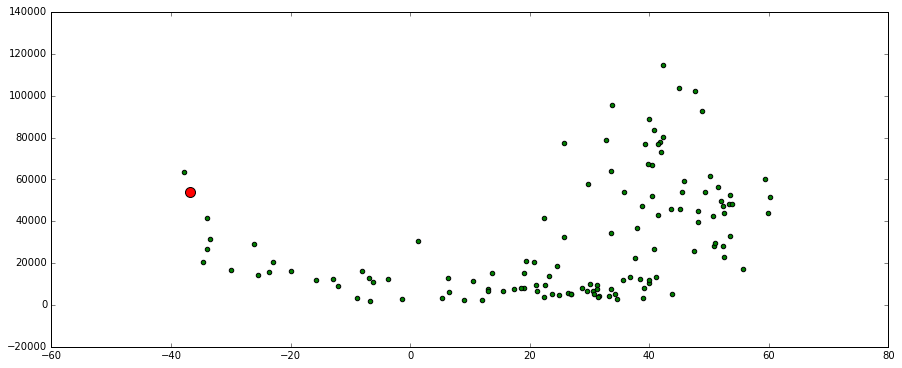

In [201]:
pylab.scatter(lats, gdp_per_capita, c='g')
x = gdpPerCapita.loc[df['country'] == 'New Zealand', 'lat']
y = gdpPerCapita.loc[df['country'] == 'New Zealand', 'gdp_per_capita']
pylab.scatter(x, y, s=100, c='r')
labels = gdpPerCapita.loc[df['country'] == 'New Zealand', 'city']
print(labels)
print(x)
print(y)
print(x.shape)
print(len(x))
print(x.iloc[0])
print(labels)
positions = [(x.iloc[i], y.iloc[i]) for i in range(len(x))]
pylab.annotate(labels, positions)
